<a href="https://colab.research.google.com/github/AlbertoMontanelli/Machine-Learning/blob/class_unit/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notation conventions
* **net** = $X \cdot W+b$, $\quad X$: input matrix, $\quad W$: weights matrix, $\quad b$: bias array;
* **number of examples** = $l$ ;
* **number of features** = $n$ ;
* **input_size** : for the layer $i$ -> $k_{i-1}$ : number of the units of the previous layer $i-1$ ;
* **outputz_size** : for the layer $i$ -> $k_{i}$ : number of the units of the current layer $i$;
* **output_value** : $o_i=f(net_i)$ for layer $i$, where $f$ is the activation function.
* **number of labels** = $d$ for each example -> $l \ \textrm{x}\ d$ matrix. \
dim(**labels**) = dim(**predictions**) = dim(**targets**).

### Input Layer $L_0$ with $k_0$ units :
* input_size = $n$;
* output_size = $k_0$;
* net = $X \cdot W +b$, $\quad X$ : $l \ \textrm{x} \ n$ matrix, $\quad W: n \ \textrm{x} \ k_0$ matrix, $\quad b = 1 \ \textrm{x} \ k_0$ array; \
$⇒$ net: $l \ \textrm{x} \ k_0$ matrix.

### Generic Layer $L_i$ with $k_i$ units :
* input_size = $k_{i-1}$ ;
* output_size = $k_i$ ;
* net = $X \cdot W+b$, $\quad X$ : $l \ \textrm{x} \ k_{i-1}$ matrix, $\quad W: k_{i-1} \ \textrm{x} \ k_i$ matrix, $\quad b = 1 \ \textrm{x} \ k_i$ array ; \
$⇒$ net : $l \ \textrm{x} \ k_i$ matrix .

### Online vs mini-batch version:
* online version: $l' = 1$ example;
* mini-batch version: $l' =$ number of examples in the mini-batch.

# Activation functions
Definition of the activation functions and their derivatives.
* **Hidden layers**:
  * **ReLU**: computationally efficient, resilient to vanishing gradient problem, suffers if net < 0;
  * **Leaky ReLU**: better than ReLU in case of convergence problems thanks to non null output for net < 0;
    * $0<$ alpha $<<1$: if alpha is too small, the gradient could be negligable;
  * **ELU**: same as Leaky ReLU, the best in term of performances but the worst in term of computational costs;
  * **tanh**: very useful if data are distributed around 0, but tends to saturate to -1 or +1 in other cases;
* **Output layer**:
  * **Regression problem**: Linear output;
  * **Binary classification**: Sigmoid, converts values to 0 or 1 via threshold while being differentiable in 0, unlike e.g. the sign function;

In [1]:
import numpy as np

# dobbiamo capire che funzioni di attivazione usare e quali derivate
# da iniziare a fare successivamente: cross validation, test vs training error, ricerca di iperparametri (grid search, n layer, n unit,
# learning rule), nr epochs/early stopping, tikhonov regularization, momentum, adaline e altre novelties

def sigmoid(net):
    return 1 / (1 + np.exp(-net))

def d_sigmoid(net):
    return np.exp(-net) / (1 + np.exp(-net))**2

def tanh(net):
    return np.tanh(net)

def d_tanh(net):
    return 1 - (np.tanh(net))**2

"""   DA RIVEDERE

def softmax(net):
    return np.exp(net) / np.sum(np.exp(net), axis = 1, keepdims=True)

def softmax_derivative(net):

    # batch_size is the number of the rows in the matrix net; current_neuron_size is the number of the columns
    batch_size, current_neuron_size = net.shape

    # initialization of Jacobian tensor: each example in the batch (batch_size) is the input to current_neuron_size neurons,
    # for each neuron we compute current_neuron_size derivatives with respect to the other neurons and itself. This results in a
    # batch_size x current_neuron_size x current_neuron_size tensor.
    jacobians = np.zeros((batch_size, current_neuron_size, current_neuron_size))

    for i in range(batch_size): # for each example i in the batch
        s = net[i].reshape(-1, 1)  # creation of a column vector of dimension current_neuron_size x 1, s contains all the features of
                                   # the example i
        jacobians[i] = np.diagflat(s) - np.dot(s, s.T)

    return jacobians
"""

def softplus(net):
    return np.log(1 + np.exp(net))

def d_softplus(net):
    return np.exp(net) / (1 + np.exp(net))

def linear(net):
    return net

def d_linear(net):
    return 1

def ReLU(net):
    return np.maximum(net, 0)

def d_ReLU(net):
    return 1 if(net>=0) else 0

def leaky_relu(net, alpha):
    return np.maximum(net, alpha*net)

def d_leaky_relu(net, alpha):
    return 1 if(net>=0) else alpha

def ELU(net):
    return net if(net>=0) else np.exp(net)-1

def d_ELU(net):
    return 1 if(net>=0) else np.exp(net)


# Loss/Error functions:
Definition of loss/error functions and their derivatives. \
For each derivative we omit a minus from the computation because it's included later in the computation of the learning rule:
* **mean_squared_error**;
* **mean_euclidian_error**;
* **huber_loss**: used when there are expected big and small errors due to outliers or noisy data.

In [2]:
def mean_squared_error(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

def d_mean_squared_error(y_true, y_pred):
    return 2 * (y_true - y_pred)  # we'd get a minus but it's included in the computation of the learning rule

def mean_euclidian_error(y_true, y_pred):
    return np.sqrt(np.sum((y_true - y_pred)**2))

def d_mean_euclidian_error(y_true, y_pred):
    return (y_true - y_pred) / np.sqrt(np.sum((y_true - y_pred)**2))  # we'd get a minus but it's included in the computation of the learning rule

def huber_loss(y_true, y_pred, delta):
    return 0.5 * (y_true - y_pred)**2 if(np.abs(y_true-y_pred)<=delta) else delta * np.abs(y_true - y_pred) - 0.5 * delta**2

def d_huber_loss(y_true, y_pred, delta):
    return y_true - y_pred if(np.abs(y_true-y_pred)<=delta) else delta * np.sign(y_true-y_pred)


#  class Layer
**Constructor parameters :**
 * input_size : $k_{i-1}$ ;
 * output_size : $k_i$ ;
 * activation_function ;
 * activation_derivative . 

**Constructor attributes :**
* self.input_size = input_size;
* self.output_size = output_size;
* self.activation_function;
* self.activation_derivative;
* self.initialize_weights(): initialize weights and biases recalling the method initialize_weights every time an istance of the class Layer is created.

**Methods :**

* **initialize_weights**: initialize weights and biases
  * attributes :
    * self.weights : $k_{i-1} \ \textrm{x} \ k_i$ matrix . \
      Initialized extracting randomly from a uniform distribution [-1/a, 1/a], where a = $\sqrt{k_{i-1}}$ ;
    * self.biases : $1 \ \textrm{x} \ k_i$ array. Initialized to zeros;
* **forward_layer** : allows to compute the output of the layer for a given input.
  * parameter :
    * input_array : matrix $X$ (see above for the case $L_0$ or $L_i$) .
  * attributes :
    * self.input : input_array ;
    * self.net : net matrix $X \cdot W + b$ (see above for the case $L_0$ or $L_i$) .
  * return -> output = $f(net)$, where $f$ is the activation function; $f(net)$ has the same dimensions of $net$.
  
* **backward_layer** : computes the gradient loss and updates the weights by the learning rule for the single layer.
  * parameters :
    * d_Ep : target_value $-$ output_value, element by element: $l \ \textrm{x} \ d$ matrix.
    * learning_rate.
  * return -> sum_delta_weights $= \delta \cdot W^T$

In [3]:
class Layer:

    def __init__(self, input_size, output_size, activation_function, activation_derivative):
        self.input_size = input_size
        self.output_size = output_size
        self.activation_function = activation_function
        self.activation_derivative = activation_derivative
        self.initialize_weights()

    def initialize_weights(self):
        self.weights = np.random.uniform(low=-1/np.sqrt(self.input_size), high=1/np.sqrt(self.input_size), size=(self.input_size, self.output_size))
        self.biases = np.zeros((1, self.output_size))
        
        
    def forward_layer(self, input_array):
        self.input = input_array
        self.net = np.dot(self.input, self.weights) + self.biases
        output = self.activation_function(self.net)
        return output


    def backward_layer(self, d_Ep, learning_rate, Lambda, reg_type):
        delta = d_Ep * self.activation_derivative(self.net) # loss gradient
        if (reg_type=='tikhonov'):
            self.weights += learning_rate * np.dot(self.input.T, delta) - Lambda*self.weights # learning rule - tikhonov regularization
        elif (reg_type=='lasso'):
            self.weights += learning_rate * np.dot(self.input.T, delta) - Lambda*np.sign(self.weights) # learning rule - lasso regularization
        elif (reg_type=='elastic'):
            self.weights += learning_rate * np.dot(self.input.T, delta) - Lambda*self.weights - Lambda*np.sign(self.weights) # learning rule:
                                                                                                                             # lasso + tikhonov
                                                                                                                             # regularization
        self.biases += learning_rate * np.sum(delta, axis = 0, keepdims = True) # learning rule for the biases
        sum_delta_weights = np.dot(delta, self.weights.T) # loss gradient for hidden layer
        return sum_delta_weights


# class NeuralNetwork
**Constructor attributes**:
 * self.layers: an empty list that will contain the layers.

**Methods**:

 * **data_split**: splits the input data into training set, validation set and test set
   * parameter:
     * x_tot: total data given as input;
     * target: total data labels given as input;
     * test_split: percentile of test set with respect to the total data.
    * return->:
      * x_train_val: training set+validation set for input data;
      * target_train_val: training set+validation set for input data labels;
      * x_test_val: test set for input data;
      * target_test_val: test set for input data labels.

     
 * **add_layer**: appends a layer to the empty list self.layers
   * parameter:
     * layer: the layer appended to the list self.layers.

* **forward**: iterates the layer.forward_layer method through each layer in the list self.layers
  * parameter:
    * input: $X$ matrix for layer $L_0$, $o_{i-1}$ for layer $L_i$.
  * return -> input = $o_i$ for layer $L_i$.
  
* **backward**: iterates from the last layer to the first layer the layer.backward_layer method, thus updating the weights and the biases for each layer.
  * parameter:
    * d_Ep;
    * learning_rate.

* **train_online**: applies the forward and backward method to the network for a specified number of epochs **one example at a time**.
  * parameter:
    * x_train: input matrix $X$;
    * target: $l \ \textrm{x} \ d$ matrix;
    * epochs: number of the iterations of the training algorithm;
    * learning_rate;
    * loss_function;
    * loss_function_derivative.

* **train_minibatch**: applies the forward and backward method to the network for a specified number of epochs **to batches of $l' < l$** examples.
  * parameter:
    * x_train: input matrix $X$;
    * target: $l \ \textrm{x} \ d$ matrix;
    * epochs: number of the iterations of the training algorithm;
    * learning_rate;
    * loss_function;
    * loss_function_derivative;
    * batch_size.


In [4]:
class NeuralNetwork:

    def __init__(self):
        self.layers = []

    def add_layer(self, layer):
        self.layers.append(layer)

    def data_split(self, x_tot, target, test_split):
        
        num_samples = x_tot.shape[0] # the total number of the examples in input
        test_size = int(num_samples * test_split) # the number of the examples in the test set
        indices = num_samples # if we don't want the randomization and the shuffle of the examples
        
        #indices = np.arange(num_samples)
        #np.random.shuffle(indices)

        x_tot = x_tot[indices]
        target = target[indices]

        x_test = x_tot[:test_size]
        target_test = target[:test_size]
        x_train_val = x_tot[test_size:]
        target_train_val = target[test_size:]

        return x_train_val, target_train_val, x_test, target_test

    def forward(self, input):
        for layer in self.layers:
            input = layer.forward_layer(input)
        return input

    def backward(self, d_Ep, learning_rate, Lambda, reg_type):
        for layer in reversed(self.layers):
            d_Ep = layer.backward_layer(d_Ep, learning_rate, Lambda, reg_type)

    def reinitialize_weights(self):
        for layer in self.layers:
            layer.initialize_weights()            
 

    def train(self, x_train, target_train, x_val, target_val, epochs, learning_rate, Lambda, reg_type, loss_function, loss_function_derivative, batch_size):
        train_error_epoch = np.zeros(epochs)
        val_error_epoch = np.zeros(epochs)

        for epoch in range(epochs):
            epoch_tr_loss = 0
            epoch_val_loss = 0


            # Shuffle training data
            train_indices = np.arange(x_train.shape[0])
            np.random.shuffle(train_indices)
            x_train = x_train[train_indices]
            target_train = target_train[train_indices]
            
            
            # Mini-batch processing, if batch_size=1 we get the online version
            for i in range(0, x_train.shape[0], batch_size):
                x_batch = x_train[i:i+batch_size]
                target_batch = target_train[i:i+batch_size]

                # Forward pass
                predictions = self.forward(x_batch)

                # Compute loss and gradient
                loss = loss_function(target_batch, predictions)
                loss_gradient = loss_function_derivative(target_batch, predictions)
                epoch_tr_loss += np.sum(loss)

                # Backward pass
                self.backward(loss_gradient, learning_rate, Lambda, reg_type)

            # Validation
            val_predictions = self.forward(x_val)
            val_loss = loss_function(target_val, val_predictions)
            epoch_val_loss = np.mean(val_loss) # the validation error is computed on all validation set after the training is finished. 
                                               # the computation of the validation error at the end of the epoch is the standard for all NN
            # Store average errors for the epoch
            train_error_epoch[epoch] = epoch_tr_loss / x_train.shape[0]
            val_error_epoch[epoch] = epoch_val_loss

        return train_error_epoch, val_error_epoch


    def k_fold_cross_validation(self, x_tot, target, K, epochs, learning_rate, Lambda, reg_type, loss_function, loss_function_derivative, batch_size):
        num_samples = x_tot.shape[0]
        fold_size = num_samples // K # if K=1 we get the hold-out validation

        # Error storage for averaging 
        avg_train_error_epoch = np.zeros(epochs)
        avg_val_error_epoch = np.zeros(epochs)
        
        if K==1: # hold-out validation
            print("sono entrato in hold-out")
            train_indices = np.arange(0, int(0.8*num_samples))
            val_indices = np.setdiff1d(np.arange(num_samples), train_indices)
            x_train, target_train = x_tot[train_indices], target[train_indices]
            x_val, target_val = x_tot[val_indices], target[val_indices]            
            train_error_epoch, val_error_epoch = self.train(
            x_train, target_train, x_val, target_val, epochs, learning_rate, Lambda, reg_type, loss_function, loss_function_derivative, batch_size
            )
            return train_error_epoch, val_error_epoch
            
        # ROBA FOTONICA PAZZESKA DI CHAT GPT, LEGGERE BENE
        for k in range(K):
            print("sono entrato in cross val")
            # Create fold indices
            val_indices = np.arange(k * fold_size, (k + 1) * fold_size) # creation of an array of indices with len = fold_size.
                                                                        # It contains the indices of the examples used in validation set for
                                                                        # this fold
            train_indices = np.setdiff1d(np.arange(num_samples), val_indices) # creation of an array of indices with len = num_samples - 
                                                                              # len(val_indices). It contains the indices of all the examples
                                                                              # but the ones used in the validation set for this fold. Thus 
                                                                              # it corresponds to the training set for this fold 
            x_train, target_train = x_tot[train_indices], target[train_indices]
            x_val, target_val = x_tot[val_indices], target[val_indices]

            # Reinitialize weights for each fold
            self.reinitialize_weights()

            # Train on the current fold
            train_error_epoch, val_error_epoch = self.train(
            x_train, target_train, x_val, target_val, epochs, learning_rate, Lambda, reg_type, loss_function, loss_function_derivative, batch_size
            )

            # Accumulate errors for averaging, we have the errors for each epoch summed for all the folds
            avg_train_error_epoch += train_error_epoch
            avg_val_error_epoch += val_error_epoch

            print(f"Fold {k+1} completed.")

        # Average errors across all folds
        avg_train_error_epoch /= K
        avg_val_error_epoch /= K
        
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}, Avg Training Loss: {train_error_epoch[epoch]}, Avg Validation Loss: {val_error_epoch[epoch]}")

        return avg_train_error_epoch, avg_val_error_epoch

          

# Unit Test

sono entrato in cross val
Fold 1 completed.
sono entrato in cross val
Fold 2 completed.
sono entrato in cross val
Fold 3 completed.
sono entrato in cross val
Fold 4 completed.
sono entrato in cross val
Fold 5 completed.
Epoch 1/500, Avg Training Loss: 0.5883695173910697, Avg Validation Loss: 107.70696372494837
Epoch 2/500, Avg Training Loss: 0.4616701468660975, Avg Validation Loss: 88.08212749716364
Epoch 3/500, Avg Training Loss: 0.3793715462325998, Avg Validation Loss: 73.77848236371625
Epoch 4/500, Avg Training Loss: 0.31964636968937227, Avg Validation Loss: 63.34517386661585
Epoch 5/500, Avg Training Loss: 0.2762872925922958, Avg Validation Loss: 55.73084913938694
Epoch 6/500, Avg Training Loss: 0.24489203809877672, Avg Validation Loss: 50.16776372132825
Epoch 7/500, Avg Training Loss: 0.22213837387092694, Avg Validation Loss: 46.10653723767463
Epoch 8/500, Avg Training Loss: 0.20564311629506185, Avg Validation Loss: 43.12488509606135
Epoch 9/500, Avg Training Loss: 0.1936514837607

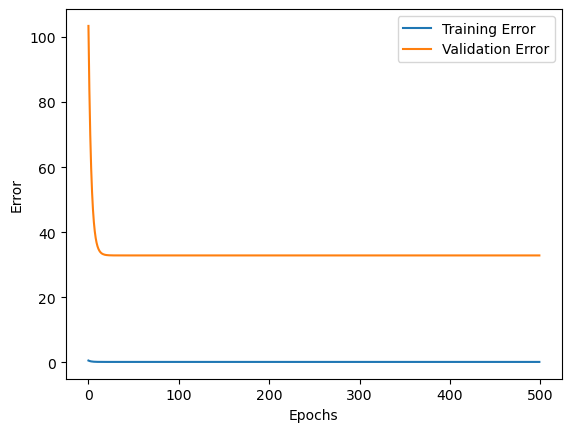

In [5]:
# IL TEST NON CONVERGE E IMPAZZISCE DOPO TOT EPOCHE
#test
np.random.seed(42)

x_tot = np.random.rand(1000, 3)
target = np.random.rand(1000, 2)

layer_one = Layer(3, 2, linear, d_linear)
layer_two = Layer(2, 2, linear, d_linear)

NN = NeuralNetwork()
NN.add_layer(layer_one)
NN.add_layer(layer_two)

# Parametri di training
K = 5
epochs = 500
learning_rate = 0.0001
Lambda = 0.1
batch_size = 50

# Cross-validation
train_error, val_error = NN.k_fold_cross_validation(x_tot, target, K, epochs, learning_rate, Lambda, 'elastic', mean_squared_error, d_mean_squared_error, batch_size)

# Plot degli errori
import matplotlib.pyplot as plt

plt.plot(train_error, label='Training Error')
plt.plot(val_error, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()